In [1]:
from intermine.webservice import Service
import pandas as pd
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles
import re

# Import and prep data

`DFC_TACvsDFC_Sham`

DFC TAC is a TMT-11plex experiment. There are multiple comparisons wihtin the experiment. However, for this analysis, we are interested in the contrast between DFC-TAC'd animals and their Sham controls. 

DFC stands for dual flox controls. These are the genetic littermate controls from the DKO (Dual-Knock-out of Crat and Sirt3) animals. In this case, they are "wildtype-like"

In this TAC experiment, animals were banded for 16 weeks with serial echocardiography at 4 week intervals. The acetyl peptide analysis showed no appreciable differences in mitochondrial acetylation between the TAC and Sham animals. This was unexpected, as we have previously found and re-validated (in another model of heart failure) the accumulation of mitochondrial AcK peptides.

`TACMIvsSham`

TAC-Mi is another TMT-11plex experiment. Again, there are multiple comparison within the experiment. However, we are interested in the comparison between the TAC-MI and their sham controls. This was the original animal model where we observed mitochondrial hyperacetylation in the failing heart. Our AcK peptide analysis on this same data set reaffirmed those previous findings. The TAC procedure for these aniamls differed from our DFC experiment in the method (Aortic banding + small apical myocardial infarction) and the duration (4 weeks). We therefore want to assess the proteome and see if there are phenotypic similarities and/or differences between these two experiments

Because these proteomic data sets were generated from two different TMT experiments, we cannot compare the protein changes across experimental groups. Instead, we will use the differences observed between each TAC group and the corresponding Sham. 

Each proteomic dataset had the followign analysis:
1. Raw data searched on Proteome Discoverer 2.2
2. "Master Proteins" (as defined in the PD22 software) were selected with a FDR <= 0.01. 
3. Master Protein abundances converted to Log2 space
4. LIMMA package (and empirical bayes function) were used to determine statistically significant changes. (FDR <0.05 using Benjamini Hochberg correction). The results are flagged as significant (1 = sig. increasing, -1 = sig. decreasing, 0 = not significant) under the "Res." + contrast name

In [2]:
tacmi_proteins = pd.read_csv('processed_files/HF_proteins/Exp2_DKOvsTACMI_Protein.csv')

dfctac_proteins = pd.read_csv('processed_files/HF_proteins/Exp3_DKOTAC_Protein.csv')

There is significant overlap in the identified proteins from both experiments, based on the proteome discoverer master protein accessions

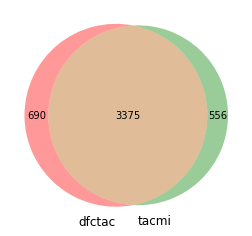

In [3]:
a = set(dfctac_proteins.Accession)
b = set(tacmi_proteins.Accession)


venn2([a,b], ['dfctac', 'tacmi'])

For our analysis, we will combine the two experiment dataframes based on these overlapping proteins (3375 Uniprot Accessions)

In [4]:
# select the columns we want from both dataframes without redundant names to worry about
dfctac_col_merge_list = ['Name',
                         'Symbol',
                         'Accession',
                         'Description',
                         'Entrez',
                         'Gene Symbol',
                         'Ensembl',
                         'MitoCarta2_List',
                         'Matrix',
                         'IMS',
                         'DFC_TACvsDFC_Sham_Log2FC',
                         'DFC_TACvsDFC_Sham_t',
                         'DFC_TACvsDFC_Sham_p_value',
                         'DFC_TACvsDFC_Sham_significant',]

tacmi_col_merge_list = ['Accession',                       
                        'TACMIvsSham_Log2FC',
                        'TACMIvsSham_t',
                        'TACMIvsSham_p_value',
                        'TACMIvsSham_significant',]

In [5]:
merged_tac = dfctac_proteins[dfctac_col_merge_list].merge(tacmi_proteins[tacmi_col_merge_list], on='Accession')
print(merged_tac.shape[0])
merged_tac.head()

3375


,Name,Symbol,Accession,Description,Entrez,Gene Symbol,Ensembl,MitoCarta2_List,Matrix,IMS,DFC_TACvsDFC_Sham_Log2FC,DFC_TACvsDFC_Sham_t,DFC_TACvsDFC_Sham_p_value,DFC_TACvsDFC_Sham_significant,TACMIvsSham_Log2FC,TACMIvsSham_t,TACMIvsSham_p_value,TACMIvsSham_significant
0,Myosin-6,Myh6,Q02566,Myosin-6 OS=Mus musculus GN=Myh6 PE=1 SV=2,17888.0,Myh6,ENSMUSG00000040752.15,False,False,False,-0.293492,-1.174021,0.269158,0,0.049553,0.880296,0.400596,0
1,Titin,Ttn,E9Q8K5,Titin OS=Mus musculus GN=Ttn PE=1 SV=1,NaN,NaN,ENSMUSG00000051747.14,False,False,False,0.560043,6.210259,0.000128,1,0.444642,6.328671,0.000112,1
2,Isoform 2 of Titin,Ttn,A2ASS6-2,Isoform 2 of Titin OS=Mus musculus GN=Ttn,22138.0,Ttn,ENSMUSG00000051747.14,False,False,False,0.185338,3.590904,0.005399,1,0.194635,2.899217,0.016821,0
3,"Trifunctional enzyme subunit alpha, mitochondrial",Hadha,Q8BMS1,"Trifunctional enzyme subunit alpha, mitochondr...",97212.0,Hadha,ENSMUSG00000025745.11,True,True,False,-0.592219,-6.727793,0.000068,-1,-0.560568,-7.568856,0.000027,-1
4,"NAD(P) transhydrogenase, mitochondrial",Nnt,Q61941,"NAD(P) transhydrogenase, mitochondrial OS=Mus ...",18115.0,Nnt,NaN,True,True,False,-0.648600,-10.102971,0.000002,-1,-0.185604,-1.921585,0.085384,0


to use the MouseMine service, you need to have an account. This can be created here: http://www.mousemine.org/mousemine/createAccount.do


Within your account, under the "Account Details" tag, locate your "API Access Key". This string of characters will serve as the token to enable you to query their servers and access your data. In the notebook uploaded to Github, I've removed my token from the code below.

In [6]:
mousemine_url = 'http://www.mousemine.org/mousemine/service'

token = 'n1H6H7u9mfE0m4Xapcjc'

service = Service(mousemine_url, token=token)
lm = service.list_manager()

In [7]:
# for the first time analyzing the data, a list needs to be created
merged_accession_list = lm.create_list(content = merged_tac.Accession,
                                       list_type = 'Protein',
                                       name = 'merged_accessions')

In [8]:
merged_accession_list.count

3368

In [ ]:
# After the lists are created, they can be fetched by uncommenting the following code
# merged_accession_list = lm.get_list('merged_accessions')

In [9]:
print(f'Merged Info\n{"":-<25}')
print(f'{"Unmatched Identifiers:":25} {merged_accession_list.unmatched_identifiers}')
print(f'{"Total Proteins Identified:":25} {merged_accession_list.count}')


Merged Info
-------------------------
Unmatched Identifiers:    {'D3Z1Z1', 'Q3UW66', 'A0A140T8M7', 'F7A8H6', 'D3YV81', 'E9QAZ2', 'A0A075B5P2'}
Total Proteins Identified: 3368


Obviously, not all of the uniprot accessions provided were identifed in the MouseMine database.

In [10]:
merged_tac[merged_tac.Accession.isin(merged_accession_list.unmatched_identifiers)]

,Name,Symbol,Accession,Description,Entrez,Gene Symbol,Ensembl,MitoCarta2_List,Matrix,IMS,DFC_TACvsDFC_Sham_Log2FC,DFC_TACvsDFC_Sham_t,DFC_TACvsDFC_Sham_p_value,DFC_TACvsDFC_Sham_significant,TACMIvsSham_Log2FC,TACMIvsSham_t,TACMIvsSham_p_value,TACMIvsSham_significant
237,Ribosomal protein L15,Gm10020,E9QAZ2,Ribosomal protein L15 OS=Mus musculus GN=Gm100...,NaN,NaN,ENSMUSG00000057262.1,False,False,False,0.211893,3.063936,0.012769,1,0.413747,4.148370,0.002256,1
1615,Immunoglobulin kappa constant (Fragment),Igkc,A0A075B5P2,Immunoglobulin kappa constant (Fragment) OS=Mu...,NaN,NaN,ENSMUSG00000076609.2,False,False,False,1.065196,4.078993,0.002501,1,0.622876,2.959102,0.015226,0
1718,Sarcolemmal membrane-associated protein (Fragm...,Slmap,D3YV81,Sarcolemmal membrane-associated protein (Fragm...,NaN,NaN,ENSMUSG00000021870.17,False,False,False,0.874639,6.081450,0.000151,1,0.969058,4.659572,0.001049,1
1898,Glutathione peroxidase,Gpx4,F7A8H6,Glutathione peroxidase OS=Mus musculus GN=Gpx4...,NaN,Gpx4,NaN,False,False,False,0.263364,4.469083,0.001383,1,0.226183,3.852203,0.003574,1
2328,Paraplegin,Spg7,D3Z1Z1,Paraplegin OS=Mus musculus GN=Spg7 PE=1 SV=2,234847.0,Spg7,ENSMUSG00000000738.18,True,False,False,-0.010525,-0.147462,0.885869,0,-0.215036,-3.552205,0.005762,-1
3307,Sulfurtransferase,Mpst,Q3UW66,Sulfurtransferase OS=Mus musculus GN=Mpst PE=1...,246221.0,Mpst,ENSMUSG00000071711.11,True,True,False,-0.310162,-4.222774,0.002006,-1,-0.160507,-1.162194,0.273751,0
3338,"Ribosomal protein L23A, pseudogene 3",Rpl23a-ps3,A0A140T8M7,"Ribosomal protein L23A, pseudogene 3 OS=Mus mu...",100041163.0,Rpl23a-ps3,ENSMUSG00000078126.3,False,False,False,0.251817,2.442890,0.036016,0,0.043868,0.706727,0.496842,0


In [11]:
query = service.new_query("Protein")

# fetch the protein information as well as the identified genes
query.add_view("primaryAccession", "length", "genes.symbol",
               "genes.ncbiGeneNumber", "genes.primaryIdentifier",
               "uniprotName", "symbol", "molecularWeight", "sequence.residues")

# Add logic to the query limiting results to proteins found in each dataset 
query.add_constraint("Protein", "IN", merged_accession_list, code = "A")

query_rows = []

for row in query.rows():
    query_rows.append(row.to_d())
    
merged_query = pd.DataFrame.from_dict(query_rows)

In [12]:
merged_query.head()

,Protein.description,Protein.ecNumber,Protein.genes.ncbiGeneNumber,Protein.genes.primaryIdentifier,Protein.genes.symbol,Protein.id,Protein.isFragment,Protein.isUniprotCanonical,Protein.length,Protein.md5checksum,Protein.molecularWeight,Protein.name,Protein.primaryAccession,Protein.primaryIdentifier,Protein.secondaryIdentifier,Protein.sequence.residues,Protein.symbol,Protein.uniprotAccession,Protein.uniprotName
0,None,None,19210,MGI:1276575,Ptdss1,66000437,False,True,473,f22701f954e90eb1dc210509c29f5888,55604.0,Phosphatidylserine synthase 1,Q99LH2,PTSS1_MOUSE,Q99LH2,MASCVGSRTLSKDDVNYRMHFRMINEQQVEDITIDFFYRPHTITLL...,None,Q99LH2,PTSS1_MOUSE
1,None,None,80912,MGI:1931749,Pum1,66000638,False,True,1189,1cd1a8e1762d62040f9b59657683b857,126619.0,Pumilio homolog 1,Q80U78,PUM1_MOUSE,Q80U78,MSVACVLKRKAVLWQDSFSPHLKHHPQEPANPNMPVVLTSGTGSQA...,None,Q80U78,PUM1_MOUSE
2,None,None,110078,MGI:97828,Pygb,66000737,False,True,843,87194571d29b5088d78c049246e510c0,96730.0,"Glycogen phosphorylase, brain form",Q8CI94,PYGB_MOUSE,Q8CI94,MAKPLTDSERQKQISVRGIAGLGDVAEVRKSFNRHLHFTLVKDRNV...,None,Q8CI94,PYGB_MOUSE
3,None,None,110095,MGI:97829,Pygl,66000768,False,True,850,6edbaead2b21a65b4f18a72d7ed507ea,97463.0,"Glycogen phosphorylase, liver form",Q9ET01,PYGL_MOUSE,Q9ET01,MAKPLTDQEKRRQISIRGIVGVENVAELKKGFNRHLHFTLVKDRNV...,None,Q9ET01,PYGL_MOUSE
4,None,None,68365,MGI:1915615,Rab14,66000825,False,True,215,dc482aca2ecc21b2f4115b9c9173994a,23897.0,Ras-related protein Rab-14,Q91V41,RAB14_MOUSE,Q91V41,MATAPYNYSYIFKYIIIGDMGVGKSCLLHQFTEKKFMADCPHTIGV...,None,Q91V41,RAB14_MOUSE


I don't like the column name format for the query results.

In [13]:
def clean_columns(x, i):
    '''x = string to clean
       i = length of string beginning to slice away
    '''
    def unCamelCase(camel):
        snake = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', camel)
        return re.sub('([a-z0-9])([A-Z])', r'\1_\2', snake).lower()
    
    return '_'.join([unCamelCase(y) for y in x[i:].split('.')])   

In [14]:
merged_query.rename(columns=lambda x: clean_columns(x, len('Protein.')), inplace=True)
merged_query.head()

,description,ec_number,genes_ncbi_gene_number,genes_primary_identifier,genes_symbol,id,is_fragment,is_uniprot_canonical,length,md5checksum,molecular_weight,name,primary_accession,primary_identifier,secondary_identifier,sequence_residues,symbol,uniprot_accession,uniprot_name
0,None,None,19210,MGI:1276575,Ptdss1,66000437,False,True,473,f22701f954e90eb1dc210509c29f5888,55604.0,Phosphatidylserine synthase 1,Q99LH2,PTSS1_MOUSE,Q99LH2,MASCVGSRTLSKDDVNYRMHFRMINEQQVEDITIDFFYRPHTITLL...,None,Q99LH2,PTSS1_MOUSE
1,None,None,80912,MGI:1931749,Pum1,66000638,False,True,1189,1cd1a8e1762d62040f9b59657683b857,126619.0,Pumilio homolog 1,Q80U78,PUM1_MOUSE,Q80U78,MSVACVLKRKAVLWQDSFSPHLKHHPQEPANPNMPVVLTSGTGSQA...,None,Q80U78,PUM1_MOUSE
2,None,None,110078,MGI:97828,Pygb,66000737,False,True,843,87194571d29b5088d78c049246e510c0,96730.0,"Glycogen phosphorylase, brain form",Q8CI94,PYGB_MOUSE,Q8CI94,MAKPLTDSERQKQISVRGIAGLGDVAEVRKSFNRHLHFTLVKDRNV...,None,Q8CI94,PYGB_MOUSE
3,None,None,110095,MGI:97829,Pygl,66000768,False,True,850,6edbaead2b21a65b4f18a72d7ed507ea,97463.0,"Glycogen phosphorylase, liver form",Q9ET01,PYGL_MOUSE,Q9ET01,MAKPLTDQEKRRQISIRGIVGVENVAELKKGFNRHLHFTLVKDRNV...,None,Q9ET01,PYGL_MOUSE
4,None,None,68365,MGI:1915615,Rab14,66000825,False,True,215,dc482aca2ecc21b2f4115b9c9173994a,23897.0,Ras-related protein Rab-14,Q91V41,RAB14_MOUSE,Q91V41,MATAPYNYSYIFKYIIIGDMGVGKSCLLHQFTEKKFMADCPHTIGV...,None,Q91V41,RAB14_MOUSE


In [15]:
print(f'Merged Query\n{"":-<25}')
print(f'{"Total Proteins From Query:":25} {merged_query.shape[0]}')

Merged Query
-------------------------
Total Proteins From Query: 3294


The number of proteins in the query from our Mouse Mine list is 3294, which is less than the number of proteins that were identified in Mouse Mine (3368). I'm not sure what happened to the 75 missing values, but I think this is caused by the MGI database annotation. For this analysis, we will simply ignore these values as 98% of the data was found

In [16]:
merged_tac = merged_tac.merge(merged_query[['primary_accession', 'genes_primary_identifier', ]], 
                              left_on='Accession', 
                              right_on='primary_accession')

In [17]:
merged_tac.head()

,Name,Symbol,Accession,Description,Entrez,Gene Symbol,Ensembl,MitoCarta2_List,Matrix,IMS,DFC_TACvsDFC_Sham_Log2FC,DFC_TACvsDFC_Sham_t,DFC_TACvsDFC_Sham_p_value,DFC_TACvsDFC_Sham_significant,TACMIvsSham_Log2FC,TACMIvsSham_t,TACMIvsSham_p_value,TACMIvsSham_significant,primary_accession,genes_primary_identifier
0,Myosin-6,Myh6,Q02566,Myosin-6 OS=Mus musculus GN=Myh6 PE=1 SV=2,17888.0,Myh6,ENSMUSG00000040752.15,False,False,False,-0.293492,-1.174021,0.269158,0,0.049553,0.880296,0.400596,0,Q02566,MGI:97255
1,Titin,Ttn,E9Q8K5,Titin OS=Mus musculus GN=Ttn PE=1 SV=1,NaN,NaN,ENSMUSG00000051747.14,False,False,False,0.560043,6.210259,0.000128,1,0.444642,6.328671,0.000112,1,E9Q8K5,MGI:98864
2,Isoform 2 of Titin,Ttn,A2ASS6-2,Isoform 2 of Titin OS=Mus musculus GN=Ttn,22138.0,Ttn,ENSMUSG00000051747.14,False,False,False,0.185338,3.590904,0.005399,1,0.194635,2.899217,0.016821,0,A2ASS6-2,MGI:98864
3,"Trifunctional enzyme subunit alpha, mitochondrial",Hadha,Q8BMS1,"Trifunctional enzyme subunit alpha, mitochondr...",97212.0,Hadha,ENSMUSG00000025745.11,True,True,False,-0.592219,-6.727793,0.000068,-1,-0.560568,-7.568856,0.000027,-1,Q8BMS1,MGI:2135593
4,"NAD(P) transhydrogenase, mitochondrial",Nnt,Q61941,"NAD(P) transhydrogenase, mitochondrial OS=Mus ...",18115.0,Nnt,NaN,True,True,False,-0.648600,-10.102971,0.000002,-1,-0.185604,-1.921585,0.085384,0,Q61941,MGI:109279


# Concordant Changes b/w Data Sets

Generate boolean masks to identify significantly changing proteins within the data. 

In [18]:
# proteins that are significantly decreasing in each dataset
down_dfctac_mask = (merged_tac['DFC_TACvsDFC_Sham_significant']==-1)
down_tacmi_mask = (merged_tac['TACMIvsSham_significant']==-1)

# proteins that are significantly increasing in each dataset
up_dfctac_mask = (merged_tac['DFC_TACvsDFC_Sham_significant']==1)
up_tacmi_mask = (merged_tac['TACMIvsSham_significant']==1)

In [19]:
concordant_tac = merged_tac[(down_dfctac_mask & down_tacmi_mask)|(up_dfctac_mask & up_tacmi_mask)]
print(concordant_tac.shape[0])
concordant_tac.head()

522


,Name,Symbol,Accession,Description,Entrez,Gene Symbol,Ensembl,MitoCarta2_List,Matrix,IMS,DFC_TACvsDFC_Sham_Log2FC,DFC_TACvsDFC_Sham_t,DFC_TACvsDFC_Sham_p_value,DFC_TACvsDFC_Sham_significant,TACMIvsSham_Log2FC,TACMIvsSham_t,TACMIvsSham_p_value,TACMIvsSham_significant,primary_accession,genes_primary_identifier
1,Titin,Ttn,E9Q8K5,Titin OS=Mus musculus GN=Ttn PE=1 SV=1,NaN,NaN,ENSMUSG00000051747.14,False,False,False,0.560043,6.210259,0.000128,1,0.444642,6.328671,0.000112,1,E9Q8K5,MGI:98864
3,"Trifunctional enzyme subunit alpha, mitochondrial",Hadha,Q8BMS1,"Trifunctional enzyme subunit alpha, mitochondr...",97212.0,Hadha,ENSMUSG00000025745.11,True,True,False,-0.592219,-6.727793,0.000068,-1,-0.560568,-7.568856,0.000027,-1,Q8BMS1,MGI:2135593
6,"Isocitrate dehydrogenase [NADP], mitochondrial",Idh2,P54071,"Isocitrate dehydrogenase [NADP], mitochondrial...",269951.0,Idh2,ENSMUSG00000030541.16,True,True,False,-0.263359,-3.041897,0.013244,-1,-0.411636,-5.646906,0.000266,-1,P54071,MGI:96414
8,Very long-chain specific acyl-CoA dehydrogenas...,Acadvl,P50544,Very long-chain specific acyl-CoA dehydrogenas...,11370.0,Acadvl,ENSMUSG00000018574.14,True,True,False,-0.581229,-5.928910,0.000183,-1,-0.292851,-4.743652,0.000929,-1,P50544,MGI:895149
10,Succinate dehydrogenase [ubiquinone] flavoprot...,Sdha,Q8K2B3,Succinate dehydrogenase [ubiquinone] flavoprot...,66945.0,Sdha,ENSMUSG00000021577.13,True,True,False,-0.320967,-5.314313,0.000413,-1,-0.308394,-5.241167,0.000460,-1,Q8K2B3,MGI:1914195


Look up the "widget" names used by the MouseMine service and identify the enrichment analyses we want

In [20]:
for x in service.widgets.keys():
    print(x)

emapa_enrichment_for_feature
disease_enrichment_for_genotype
go_enrichment_for_gene
chromosome_distribution_for_feature
disease_enrichment_for_feature
mp_enrichment_for_feature
prot_dom_enrichment_for_protein
uniprot_keywords_for_protein
disease_enrichment_for_allele
pathway_enrichment_for_Protein
pathway_enrichment_for_gene
prot_dom_enrichment_for_gene
mp_enrichment_for_allele
mp_enrichment_for_genotype
uniprot_feature_for_protein


## Protein Pathway Enrichment

Make an intermine list to hold the concordant Uniprot Accessions (protein identifiers)

In [21]:
concordant_accession_list = lm.create_list(content = concordant_tac.Accession,
                                           list_type = 'Protein',
                                           name = 'concordant_accessions')

In [22]:
pathway_enrichment_list = []
for item in concordant_accession_list.calculate_enrichment('pathway_enrichment_for_Protein', 
                                                           background='merged_accessions',
                                                           correction="Benjamini Hochberg",
                                                           maxp=0.05, ):
    pathway_enrichment_list.append(item.data)

concordant_accession_enrichment = pd.DataFrame.from_dict(pathway_enrichment_list)
concordant_accession_enrichment

,description,identifier,matches,p-value,populationAnnotationCount
0,Metabolism,R-MMU-1430728,142,4.471253e-10,523
1,Mitochondrial Fatty Acid Beta-Oxidation,R-MMU-77289,16,3.973451e-05,24
2,Fatty acid metabolism,R-MMU-8978868,30,9.679851e-05,71
3,Citric acid cycle (TCA cycle),R-MMU-71403,12,1.376779e-04,16
4,The citric acid (TCA) cycle and respiratory el...,R-MMU-1428517,34,2.698227e-03,99
5,Pyruvate metabolism and Citric Acid (TCA) cycle,R-MMU-71406,17,4.089815e-03,36
6,mitochondrial fatty acid beta-oxidation of sat...,R-MMU-77286,7,4.726630e-03,8
7,Biotin transport and metabolism,R-MMU-196780,5,2.192060e-02,5
8,Branched-chain amino acid catabolism,R-MMU-70895,9,2.814301e-02,15
9,Metabolism of lipids,R-MMU-556833,40,2.830926e-02,140


Now, we'll make a dictionary to store the dataframes for later export

In [23]:
enrichments = dict()

enrichments['concordant_accessions'] = concordant_accession_enrichment

## Gene Pathway Enrichment

The previous analysis relied on the protein accessions. Now, we are going to use the corresponding gene information for a similar analysis. Along the way, the numbers will change as some proteins are produced by the same gene

Make an intermine list to hold the background MGI identifiers (merged datasets)

In [24]:
# for the first time analyzing the data, a list needs to be created
merged_mgi_list = lm.create_list(content = merged_tac.genes_primary_identifier,
                                 list_type = 'Gene',
                                 name = 'merged_mgi')

In [25]:
print(f'Merged Data\n{"":-<25}')
print(f'{"Total Unique MGIs from Merged Data:":35} {merged_tac.genes_primary_identifier.unique().shape[0]}')
print(f'{"Total MGIs from List:":35} {merged_mgi_list.count}')


Merged Data
-------------------------
Total Unique MGIs from Merged Data: 3242
Total MGIs from List:               3242


Make an intermine list to hold the concordant MGI identifier (genes identifiers)

In [26]:
concordant_mgi_list = lm.create_list(content = concordant_tac.genes_primary_identifier,
                                     list_type = 'Gene',
                                     name = 'concordant_mgi')

In [27]:
print(f'Concordant Data\n{"":-<25}')
print(f'{"Total Unique MGIs from Concordant Data:":40} {concordant_tac.genes_primary_identifier.unique().shape[0]}')
print(f'{"Total Concordant MGIs from List:":40} {concordant_mgi_list.count}')


Concordant Data
-------------------------
Total Unique MGIs from Concordant Data:  518
Total Concordant MGIs from List:         518


In [28]:
pathway_enrichment_list = []
for item in concordant_mgi_list.calculate_enrichment('pathway_enrichment_for_gene', 
                                                     background='merged_mgi',
                                                     correction="Benjamini Hochberg",
                                                     maxp=0.05, ):
    pathway_enrichment_list.append(item.data)

concordant_mgi_enrichment = pd.DataFrame.from_dict(pathway_enrichment_list)
concordant_mgi_enrichment

,description,identifier,matches,p-value,populationAnnotationCount
0,Metabolism,R-MMU-1430728,165,2.644004e-11,604
1,Citric acid cycle (TCA cycle),R-MMU-71403,14,1.610125e-05,18
2,Fatty acid metabolism,R-MMU-8978868,33,1.146891e-04,81
3,Mitochondrial Fatty Acid Beta-Oxidation,R-MMU-77289,17,1.596907e-04,29
4,The citric acid (TCA) cycle and respiratory el...,R-MMU-1428517,39,3.069305e-04,109
5,Branched-chain amino acid catabolism,R-MMU-70895,13,4.962474e-04,20
6,mitochondrial fatty acid beta-oxidation of sat...,R-MMU-77286,8,1.029016e-03,9
7,Pyruvate metabolism and Citric Acid (TCA) cycle,R-MMU-71406,19,1.872766e-03,41
8,Metabolism of amino acids and derivatives,R-MMU-71291,27,4.267304e-03,73
9,Glucose metabolism,R-MMU-70326,13,3.795087e-02,28


In [29]:
enrichments['concordant_mgi'] = concordant_mgi_enrichment

# Unique Changes b/w Data Sets

The followign mask will find the proteins that are different betweeen the two datasets. This will include situations where the protein is increased (or decreased) in one dataset, but not in the other. Or it will include situations where the protein is changing opposite in either dataset. 

In [30]:
# proteins where the changes are not the same between datasets
diff_mask = (merged_tac['DFC_TACvsDFC_Sham_significant'] != merged_tac['TACMIvsSham_significant'])

When this mask is combined with the significantly changing proteins within each dataset, it allows us to find the unique changes within each dataset

In [31]:
dfctac_unique = merged_tac[(down_dfctac_mask|up_dfctac_mask) & diff_mask]

tacmi_unique = merged_tac[(down_tacmi_mask|up_tacmi_mask) & diff_mask]


In [32]:
print(f'Unique Changes in DFC TAC\n{"":-<25}')
print(f'{"Total Unique Accessions:":40} {dfctac_unique.Accession.unique().shape[0]}')
print(f'{"Total Unique Genes:":40} {dfctac_unique.genes_primary_identifier.unique().shape[0]}')


Unique Changes in DFC TAC
-------------------------
Total Unique Accessions:                 559
Total Unique Genes:                      556


In [33]:
print(f'Unique Changes in TAC-MI\n{"":-<25}')
print(f'{"Total Unique Accessions:":40} {tacmi_unique.Accession.unique().shape[0]}')
print(f'{"Total Unique Genes:":40} {tacmi_unique.genes_primary_identifier.unique().shape[0]}')


Unique Changes in TAC-MI
-------------------------
Total Unique Accessions:                 478
Total Unique Genes:                      479


## Protein Pathway Enrichment

In [34]:
dfctac_unique_accession_list = lm.create_list(content = dfctac_unique.Accession,
                                              list_type = 'Protein',
                                              name = 'dfctac_unique_accessions')

In [35]:
tacmi_unique_accession_list = lm.create_list(content = tacmi_unique.Accession,
                                             list_type = 'Protein',
                                             name = 'tacmi_unique_accessions')

In [36]:
pathway_enrichment_list = []
for item in dfctac_unique_accession_list.calculate_enrichment('pathway_enrichment_for_Protein', 
                                                              background='merged_accessions',
                                                              correction="Benjamini Hochberg",
                                                              maxp=0.05, ):
    pathway_enrichment_list.append(item.data)

dfctac_unique_enrichment = pd.DataFrame.from_dict(pathway_enrichment_list)
dfctac_unique_enrichment

,description,identifier,matches,p-value,populationAnnotationCount
0,Complex I biogenesis,R-MMU-6799198,24,0.000011,45
1,"Respiratory electron transport, ATP synthesis ...",R-MMU-163200,29,0.000017,63
2,Respiratory electron transport,R-MMU-611105,25,0.000020,48
3,The citric acid (TCA) cycle and respiratory el...,R-MMU-1428517,32,0.027003,99


In [37]:
enrichments['dfctac_unique_accession'] = dfctac_unique_enrichment

In [38]:
pathway_enrichment_list = []
for item in tacmi_unique_accession_list.calculate_enrichment('pathway_enrichment_for_Protein',
                                                             background='merged_accessions',
                                                             correction="Benjamini Hochberg",
                                                             maxp=0.05, ):
    pathway_enrichment_list.append(item.data)

tacmi_unique_enrichment = pd.DataFrame.from_dict(pathway_enrichment_list)
tacmi_unique_enrichment

""


Note - the pathway enrichment for the unique changing proteins in the TAC-MI data set is empty with a threshold significance of 0.05. Below is the resulting data without  a significance cutoff. Nothing is significant in this set

In [39]:
enrichments['tacmi_unique_accession'] = tacmi_unique_enrichment

In [40]:
pathway_enrichment_list = []
for item in tacmi_unique_accession_list.calculate_enrichment('pathway_enrichment_for_Protein',
                                                             background='merged_accessions',
                                                             correction="Benjamini Hochberg",
                                                             maxp=1):
    pathway_enrichment_list.append(item.data)

pd.DataFrame.from_dict(pathway_enrichment_list)


,description,identifier,matches,p-value,populationAnnotationCount
0,Nucleobase biosynthesis,R-MMU-8956320,6,0.677328,10
1,Apoptosis,R-MMU-109581,6,1.000000,41
2,Hemostasis,R-MMU-109582,24,1.000000,143
3,Intrinsic Pathway for Apoptosis,R-MMU-109606,2,1.000000,12
4,PI3K Cascade,R-MMU-109704,1,1.000000,4
5,Translesion synthesis by Y family DNA polymera...,R-MMU-110313,1,1.000000,7
6,Recognition of DNA damage by PCNA-containing r...,R-MMU-110314,1,1.000000,5
7,Translesion Synthesis by POLH,R-MMU-110320,1,1.000000,5
8,Activation of BAD and translocation to mitocho...,R-MMU-111447,2,1.000000,6
9,Apoptotic cleavage of cellular proteins,R-MMU-111465,1,1.000000,17


## Gene Pathway Enrichment

In [41]:
dfctac_unique_mgi_list = lm.create_list(content = dfctac_unique.genes_primary_identifier,
                                        list_type = 'Gene',
                                        name = 'dfctac_unique_mgi')

In [42]:
tacmi_unique_mgi_list = lm.create_list(content = tacmi_unique.genes_primary_identifier,
                                       list_type = 'Gene',
                                       name = 'tacmi_unique_mgi')

In [43]:
pathway_enrichment_list = []
for item in dfctac_unique_mgi_list.calculate_enrichment('pathway_enrichment_for_gene', 
                                                        background='merged_mgi',
                                                        correction="Benjamini Hochberg",
                                                        maxp=0.05, ):
    pathway_enrichment_list.append(item.data)

dfctac_unique_mgi_enrichment = pd.DataFrame.from_dict(pathway_enrichment_list)
dfctac_unique_mgi_enrichment

,description,identifier,matches,p-value,populationAnnotationCount
0,Respiratory electron transport,R-MMU-611105,27,0.000011,53
1,Complex I biogenesis,R-MMU-6799198,26,0.000013,49
2,"Respiratory electron transport, ATP synthesis ...",R-MMU-163200,31,0.000018,68
3,The citric acid (TCA) cycle and respiratory el...,R-MMU-1428517,35,0.030765,109


In [44]:
pathway_enrichment_list = []
for item in tacmi_unique_mgi_list.calculate_enrichment('pathway_enrichment_for_gene', 
                                                        background='merged_mgi',
                                                        correction="Benjamini Hochberg",
                                                        maxp=0.05, ):
    pathway_enrichment_list.append(item.data)

tacmi_unique_mgi_enrichment = pd.DataFrame.from_dict(pathway_enrichment_list)
tacmi_unique_mgi_enrichment

""


In [45]:
enrichments['dfctac_unique_mgi'] = dfctac_unique_mgi_enrichment
enrichments['tacmi_unique_mgi'] = tacmi_unique_mgi_enrichment

# Identify the Proteins/Genes identified in the enrichments

## Concordant Changes - Fatty Acid Metabolism

### Protein

In [46]:
concordant_accession_enrichment[concordant_accession_enrichment['description']=='Fatty acid metabolism']

,description,identifier,matches,p-value,populationAnnotationCount
2,Fatty acid metabolism,R-MMU-8978868,30,0.000097,71


Query MouseMine for the proteins that are tagged with R-MMU-8978868 and in the concordant accession list

In [47]:
query = service.new_query("Protein")
query.add_view("primaryAccession", "length", "genes.symbol",
               "genes.ncbiGeneNumber", "genes.primaryIdentifier",
               "uniprotName", "symbol", "molecularWeight", "sequence.residues")

# Add logic to the query limiting results to proteins to concordantly change
query.add_constraint("Protein", "IN", concordant_accession_list, code = "A")
# Add logic to the query limiting results to the pathway identifier that corresponds to "Fatty acid metabolism" - R-MMU-8978868
query.add_constraint("pathways.identifier", "ONE OF", ["R-MMU-8978868"], code = "B")
# set the logic
query.set_logic("A and B")

# list to temp. store the query results
protein_list = []


for row in query.rows():
    protein_list.append(row.to_d())
    
fattyacid_metab_accession = pd.DataFrame.from_dict(protein_list)

In [48]:
fattyacid_metab_accession.rename(columns=lambda x: clean_columns(x, len('Protein.')), inplace=True)

In [49]:
fattyacid_metab_accession.shape[0]

30

In [75]:
fattyacid_metab_accession.to_pickle('fattyacid_metab_accession.pkl')

In [50]:
fattyacid_metab_acc_merged = merged_tac.merge(fattyacid_metab_accession, left_on='Accession', right_on='primary_accession')

In [51]:
(fattyacid_metab_acc_merged[['Name', 'Symbol','Accession', 'DFC_TACvsDFC_Sham_significant']]
 .sort_values('DFC_TACvsDFC_Sham_significant'))

,Name,Symbol,Accession,DFC_TACvsDFC_Sham_significant
0,"Trifunctional enzyme subunit alpha, mitochondrial",Hadha,Q8BMS1,-1
26,Mitochondrial carnitine/acylcarnitine carrier ...,Slc25a20,Q9Z2Z6,-1
25,"Acyl carrier protein, mitochondrial",Ndufab1,Q9CR21,-1
24,Acetyl-CoA carboxylase 2,Acacb,E9Q4Z2,-1
23,"Enoyl-CoA delta isomerase 1, mitochondrial",Eci1,P42125,-1
22,"Propionyl-CoA carboxylase beta chain, mitochon...",Pccb,Q99MN9,-1
21,"Propionyl-CoA carboxylase alpha chain, mitocho...",Pcca,Q91ZA3,-1
20,"3-ketoacyl-CoA thiolase, mitochondrial",Acaa2,Q8BWT1,-1
19,"Hydroxyacyl-coenzyme A dehydrogenase, mitochon...",Hadh,Q61425,-1
18,Peroxisomal trans-2-enoyl-CoA reductase,Pecr,Q99MZ7,-1


### Gene

In [52]:
concordant_mgi_enrichment[concordant_mgi_enrichment['description']=='Fatty acid metabolism']

,description,identifier,matches,p-value,populationAnnotationCount
2,Fatty acid metabolism,R-MMU-8978868,33,0.000115,81


Query MouseMine for the Genes that are tagged with R-MMU-8978868 and in the concordant MGI list

In [53]:
query = service.new_query("Gene")
query.add_view("primaryIdentifier")

# Add logic to the query limiting results to proteins to concordantly change
query.add_constraint("Gene", "IN", concordant_mgi_list, code = "A")
# Add logic to the query limiting results to the pathway identifier that corresponds to "Fatty acid metabolism" - R-MMU-8978868
query.add_constraint("pathways.identifier", "ONE OF", ["R-MMU-8978868"], code = "B")
# set the logic
query.set_logic("A and B")

# list to temp. store the query results
gene_list = []


for row in query.rows():
    gene_list.append(row.to_d())
    
fattyacid_metab_mgi = pd.DataFrame.from_dict(gene_list)

In [54]:
fattyacid_metab_mgi.rename(columns=lambda x: clean_columns(x, len('Gene.')), inplace=True)

In [55]:
fattyacid_metab_mgi.shape[0]

33

In [56]:
fattyacid_metab_mgi_merged = concordant_tac.merge(fattyacid_metab_mgi, 
                                              left_on='genes_primary_identifier', 
                                              right_on='primary_identifier')

In [57]:
(fattyacid_metab_mgi_merged[['Name', 'Symbol','genes_primary_identifier', 'DFC_TACvsDFC_Sham_significant']]
 .sort_values('DFC_TACvsDFC_Sham_significant'))

,Name,Symbol,genes_primary_identifier,DFC_TACvsDFC_Sham_significant
0,"Trifunctional enzyme subunit alpha, mitochondrial",Hadha,MGI:2135593,-1
29,Mitochondrial carnitine/acylcarnitine carrier ...,Slc25a20,MGI:1928738,-1
28,"Acyl carrier protein, mitochondrial",Ndufab1,MGI:1917566,-1
27,Isoform Long of Estradiol 17-beta-dehydrogenase 8,Hsd17b8,MGI:95911,-1
26,Acetyl-CoA carboxylase 2,Acacb,MGI:2140940,-1
25,"Enoyl-CoA delta isomerase 1, mitochondrial",Eci1,MGI:94871,-1
24,"Propionyl-CoA carboxylase beta chain, mitochon...",Pccb,MGI:1914154,-1
23,"Propionyl-CoA carboxylase alpha chain, mitocho...",Pcca,MGI:97499,-1
22,"3-ketoacyl-CoA thiolase, mitochondrial",Acaa2,MGI:1098623,-1
21,"Hydroxyacyl-coenzyme A dehydrogenase, mitochon...",Hadh,MGI:96009,-1


## Unique Changes in DFC-TAC - Complex I biogenesis

### Protein

In [58]:
dfctac_unique_enrichment[dfctac_unique_enrichment['description']=='Complex I biogenesis']

,description,identifier,matches,p-value,populationAnnotationCount
0,Complex I biogenesis,R-MMU-6799198,24,0.000011,45


Query MouseMine for the proteins that are tagged with R-MMU-6799198 and in the DFC-TAC unique accession list

In [59]:
query = service.new_query("Protein")
query.add_view("primaryAccession", "length", "genes.symbol",
               "genes.ncbiGeneNumber", "genes.primaryIdentifier",
               "uniprotName", "symbol", "molecularWeight", "sequence.residues")

# Add logic to the query limiting results to proteins to concordantly change
query.add_constraint("Protein", "IN", dfctac_unique_accession_list, code = "A")
# Add logic to the query limiting results to the pathway identifier that corresponds to "Complex I Biogenesis" - R-MMU-6799198
query.add_constraint("pathways.identifier", "ONE OF", ["R-MMU-6799198"], code = "B")
# set the logic
query.set_logic("A and B")

# list to temp. store the query results
protein_list = []


for row in query.rows():
    protein_list.append(row.to_d())
    
CI_biogen_accession = pd.DataFrame.from_dict(protein_list)

In [60]:
CI_biogen_accession.rename(columns=lambda x: clean_columns(x, len('Protein.')), inplace=True)

In [61]:
CI_biogen_accession.shape[0]

24

In [62]:
CI_biogen_acc_merged = dfctac_unique.merge(CI_biogen_accession, left_on='Accession', right_on='primary_accession')

In [63]:
CI_biogen_acc_merged[['Name', 'Symbol','Accession', 'DFC_TACvsDFC_Sham_significant']]

,Name,Symbol,Accession,DFC_TACvsDFC_Sham_significant
0,"NADH-ubiquinone oxidoreductase 75 kDa subunit,...",Ndufs1,Q91VD9,-1
1,NADH dehydrogenase [ubiquinone] flavoprotein 1...,Ndufv1,Q91YT0,-1
2,NADH dehydrogenase [ubiquinone] 1 alpha subcom...,Ndufa5,Q9CPP6,-1
3,NADH dehydrogenase [ubiquinone] iron-sulfur pr...,Ndufs2,Q91WD5,-1
4,NADH dehydrogenase [ubiquinone] 1 alpha subcom...,Ndufa2,Q9CQ75,-1
5,NADH dehydrogenase [ubiquinone] iron-sulfur pr...,Ndufs6,P52503,-1
6,NADH dehydrogenase [ubiquinone] 1 beta subcomp...,Ndufb9,Q9CQJ8,-1
7,NADH dehydrogenase [ubiquinone] 1 alpha subcom...,Ndufa6,Q9CQZ5,-1
8,NADH dehydrogenase [ubiquinone] 1 beta subcomp...,Ndufb8,Q9D6J5,-1
9,NADH dehydrogenase [ubiquinone] iron-sulfur pr...,Ndufs5,Q99LY9,-1


### Gene

In [64]:
dfctac_unique_mgi_enrichment[dfctac_unique_mgi_enrichment['description']=='Complex I biogenesis']

,description,identifier,matches,p-value,populationAnnotationCount
1,Complex I biogenesis,R-MMU-6799198,26,0.000013,49


Query MouseMine for the Genes that are tagged with R-MMU-6799198 and in the DFC-TAC unique accession list

In [65]:
query = service.new_query("Gene")
query.add_view("primaryIdentifier")

# Add logic to the query limiting results to proteins to concordantly change
query.add_constraint("Gene", "IN", dfctac_unique_mgi_list, code = "A")
# Add logic to the query limiting results to the pathway identifier that corresponds to "Complex I Biogenesis" - R-MMU-6799198
query.add_constraint("pathways.identifier", "ONE OF", ["R-MMU-6799198"], code = "B")
# set the logic
query.set_logic("A and B")

# list to temp. store the query results
gene_list = []


for row in query.rows():
    gene_list.append(row.to_d())
    
CI_biogen_mgi = pd.DataFrame.from_dict(gene_list)

In [66]:
CI_biogen_mgi.rename(columns=lambda x: clean_columns(x, len('Gene.')), inplace=True)

In [73]:
CI_biogen_mgi.to_pickle('CI_biogen_mgi.pkl')

In [67]:
CI_biogen_mgi.shape[0]

26

In [68]:
CI_biogen_mgi_merged = dfctac_unique.merge(CI_biogen_mgi, 
                                        left_on='genes_primary_identifier', 
                                        right_on='primary_identifier')

In [69]:
CI_biogen_mgi_merged[['Name', 'Symbol', 'Accession', 'genes_primary_identifier', 'DFC_TACvsDFC_Sham_significant']]

,Name,Symbol,Accession,genes_primary_identifier,DFC_TACvsDFC_Sham_significant
0,"NADH-ubiquinone oxidoreductase 75 kDa subunit,...",Ndufs1,Q91VD9,MGI:2443241,-1
1,NADH dehydrogenase [ubiquinone] flavoprotein 1...,Ndufv1,Q91YT0,MGI:107851,-1
2,NADH dehydrogenase [ubiquinone] 1 alpha subcom...,Ndufa5,Q9CPP6,MGI:1915452,-1
3,NADH dehydrogenase [ubiquinone] iron-sulfur pr...,Ndufs2,Q91WD5,MGI:2385112,-1
4,NADH dehydrogenase [ubiquinone] 1 alpha subcom...,Ndufa2,Q9CQ75,MGI:1343103,-1
5,NADH dehydrogenase [ubiquinone] iron-sulfur pr...,Ndufs6,P52503,MGI:107932,-1
6,NADH dehydrogenase [ubiquinone] 1 beta subcomp...,Ndufb9,Q9CQJ8,MGI:1913468,-1
7,NADH dehydrogenase [ubiquinone] 1 alpha subcom...,Ndufa6,Q9CQZ5,MGI:1914380,-1
8,NADH dehydrogenase [ubiquinone] iron-sulfur pr...,Ndufs4,E9QPX3,MGI:1343135,-1
9,NADH dehydrogenase [ubiquinone] 1 beta subcomp...,Ndufb8,Q9D6J5,MGI:1914514,-1


# Export Key Data

First, we will export the enrichment tables

In [ ]:
writer = pd.ExcelWriter('exported_data/enrichment_tables.xlsx', options={'strings_to_numbers': True})

for sheet_name, df in enrichments.items():
    df.to_excel(writer, sheet_name=sheet_name)
    
writer.save()

Next, we will export the list of proteins/genes that were identified within the look-up examples. These were chosen as they were highlighted in Figure 4 of the paper. 

In [ ]:
writer = pd.ExcelWriter('exported_data/enriched_highlights.xlsx', options={'strings_to_numbers': True})


(fattyacid_metab_acc_merged[['Name', 'Symbol','Accession', 'DFC_TACvsDFC_Sham_significant']]
 .sort_values('DFC_TACvsDFC_Sham_significant')
 .to_excel(writer, sheet_name='Prot_enrich_concord_fattyacid'))

(fattyacid_metab_mgi_merged[['Name', 'Symbol','genes_primary_identifier', 'DFC_TACvsDFC_Sham_significant']]
 .sort_values('DFC_TACvsDFC_Sham_significant')
 .to_excel(writer, sheet_name='Gene_enrich_concord_fattyacid'))

(CI_biogen_acc_merged[['Name', 'Symbol','Accession', 'DFC_TACvsDFC_Sham_significant']]
 .to_excel(writer, sheet_name='Prot_enrich_dfc_unique_CI'))

(CI_biogen_mgi_merged[['Name', 'Symbol', 'genes_primary_identifier', 'DFC_TACvsDFC_Sham_significant']]
 .to_excel(writer, sheet_name='Gene_enrich_dfc_unique_CI'))

writer.save()

In [70]:
merged_tac.to_pickle('merged_tac.pkl')